In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

FIG_PATH = './Figures/'

In [2]:
with open ('/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/ablation/images/names.txt', 'r') as f:
    names = f.readlines()
    names = [name.strip() for name in names]

In [3]:
# Create a directory for each name
for name in names:
    if not os.path.exists(FIG_PATH + name):
        os.makedirs(FIG_PATH + name)

In [4]:
with open ('/home/matthewkenely/Programming/Assignments/ICT3909 Final Year Project in Artificial Intelligence/ICT3909/ablation/images/pair_names.txt', 'r') as f:
    pair_names = f.readlines()
    pair_names = [name.strip() for name in pair_names]

In [5]:
pairs = [(i, i + 10) for i in range(10)]

In [6]:
images = {}
deepgaze = {}
tracking = {}
trajectories = {}
ranks = {}

In [7]:
def crop_transparent(image):
    # Convert image to RGBA if it's not already in that format
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Create a mask of non-transparent pixels
    # mask has same shape as image
    mask = np.zeros_like(image[:,:,3])
    mask[image[:,:,3] == 0] = 255

    # Create copy of the image from the coordinates of the mask which are 255
    cropped_image = image[np.min(np.where(mask == 0)[0]):np.max(np.where(mask == 0)[0]), np.min(np.where(mask == 0)[1]):np.max(np.where(mask == 0)[1])]

    return cv2.cvtColor(cropped_image, cv2.COLOR_BGRA2RGB)

In [32]:
new_width = 1920
new_height = 1080

for p in range(10):
    DIR = FIG_PATH + names[p] + '/'

    images[names[pairs[p][0]]] = {}
    images[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '.png', cv2.IMREAD_UNCHANGED)
    images[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '.png', cv2.IMREAD_UNCHANGED)

    for key in images[names[pairs[p][0]]]:
        images[names[pairs[p][0]]][key] = crop_transparent(images[names[pairs[p][0]]][key])
        images[names[pairs[p][0]]][key] = cv2.resize(images[names[pairs[p][0]]][key], (new_width, new_height))

    deepgaze[names[pairs[p][0]]] = {}
    deepgaze[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)
    deepgaze[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)
    for key in deepgaze[names[pairs[p][0]]]:
        deepgaze[names[pairs[p][0]]][key] = crop_transparent(deepgaze[names[pairs[p][0]]][key])
        deepgaze[names[pairs[p][0]]][key] = cv2.resize(deepgaze[names[pairs[p][0]]][key], (new_width, new_height))

    try:
        tracking[names[pairs[p][0]]] = {}
        tracking[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_EYE.png', cv2.IMREAD_UNCHANGED)
        tracking[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_EYE.png', cv2.IMREAD_UNCHANGED)

        for key in tracking[names[pairs[p][0]]]:
            tracking[names[pairs[p][0]]][key] = crop_transparent(tracking[names[pairs[p][0]]][key])
            tracking[names[pairs[p][0]]][key] = cv2.resize(tracking[names[pairs[p][0]]][key], (new_width, new_height))
    except:
        tracking[names[pairs[p][0]]] = {}
        tracking[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)
        tracking[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_DEEPGAZE.png', cv2.IMREAD_UNCHANGED)

        for key in tracking[names[pairs[p][0]]]:
            tracking[names[pairs[p][0]]][key] = crop_transparent(tracking[names[pairs[p][0]]][key])
            tracking[names[pairs[p][0]]][key] = cv2.resize(tracking[names[pairs[p][0]]][key], (new_width, new_height))

    trajectories[names[pairs[p][0]]] = {}
    trajectories[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_MOUSE.png', cv2.IMREAD_UNCHANGED)
    trajectories[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_MOUSE.png', cv2.IMREAD_UNCHANGED)

    for key in trajectories[names[pairs[p][0]]]:
        trajectories[names[pairs[p][0]]][key] = crop_transparent(trajectories[names[pairs[p][0]]][key])
        trajectories[names[pairs[p][0]]][key] = cv2.resize(trajectories[names[pairs[p][0]]][key], (new_width, new_height))

    ranks[names[pairs[p][0]]] = {}
    ranks[names[pairs[p][0]]]['A'] = cv2.imread(DIR + pair_names[pairs[p][0]] + '_RANKS.png', cv2.IMREAD_UNCHANGED)
    ranks[names[pairs[p][0]]]['B'] = cv2.imread(DIR + pair_names[pairs[p][1]] + '_RANKS.png', cv2.IMREAD_UNCHANGED)

    for key in ranks[names[pairs[p][0]]]:
        ranks[names[pairs[p][0]]][key] = crop_transparent(ranks[names[pairs[p][0]]][key])
        ranks[names[pairs[p][0]]][key] = cv2.resize(ranks[names[pairs[p][0]]][key], (new_width, new_height))

    break


In [33]:
from PIL import ImageFont, ImageDraw, Image

# Add 100px of black at the bottom of each image, as well as a corresponding label in text
for p in range(10):
    # Black top
    border_size = 80
    o = 5
    colour = (21, 21, 21)
    for group in ['A', 'B']:
        images[names[pairs[p][0]]][group] =         cv2.copyMakeBorder(images[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        deepgaze[names[pairs[p][0]]][group] =       cv2.copyMakeBorder(deepgaze[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        tracking[names[pairs[p][0]]][group] =       cv2.copyMakeBorder(tracking[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        trajectories[names[pairs[p][0]]][group] =   cv2.copyMakeBorder(trajectories[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)
        ranks[names[pairs[p][0]]][group] =          cv2.copyMakeBorder(ranks[names[pairs[p][0]]][group], o, border_size, o, o, cv2.BORDER_CONSTANT, value=colour)

    # Text
    for group in ['A', 'B']:
        font_colour = (232, 232, 232)
        text_x = 20
        text_y = 1090

        text = names[pairs[p][0]]

        if group == 'A':
            text += ' | CTRL'
        else:
            text += ' | EXPR'

        font_path = '/home/matthewkenely/Downloads/JetBrains/fonts/ttf/JetBrainsMono-Regular.ttf'
        font_size = 45
        font = ImageFont.truetype(font_path, font_size)

        pil_image = Image.fromarray(images[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text, font=font, fill=font_colour, align="left")
        images[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        # Repeat for other dictionaries
        pil_image = Image.fromarray(deepgaze[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | DEEPGAZE', font=font, fill=font_colour, align="left")
        deepgaze[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(tracking[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | EYE-TRACKING', font=font, fill=font_colour, align="left")
        tracking[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(trajectories[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | MOUSE TRAJECTORIES', font=font, fill=font_colour, align="left")
        trajectories[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

        pil_image = Image.fromarray(ranks[names[pairs[p][0]]][group][:, :, ::-1])
        draw = ImageDraw.Draw(pil_image)
        draw.text((text_x, text_y), text + ' | SARA RANKS', font=font, fill=font_colour, align="left")
        ranks[names[pairs[p][0]]][group] = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    break

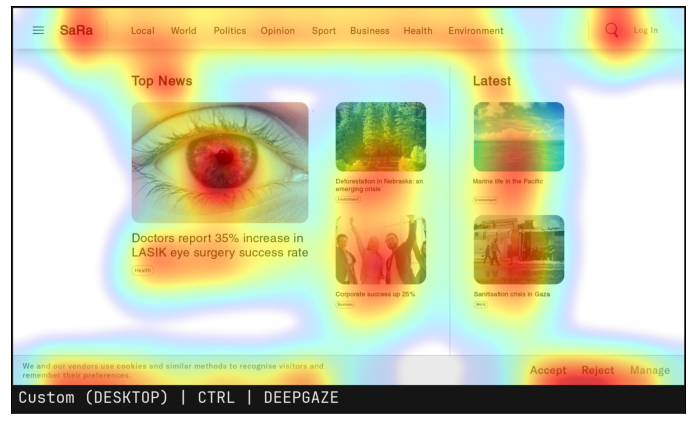

In [34]:
plt.figure(figsize=(12,6))
plt.imshow(deepgaze[names[pairs[p][0]]]['A'])
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

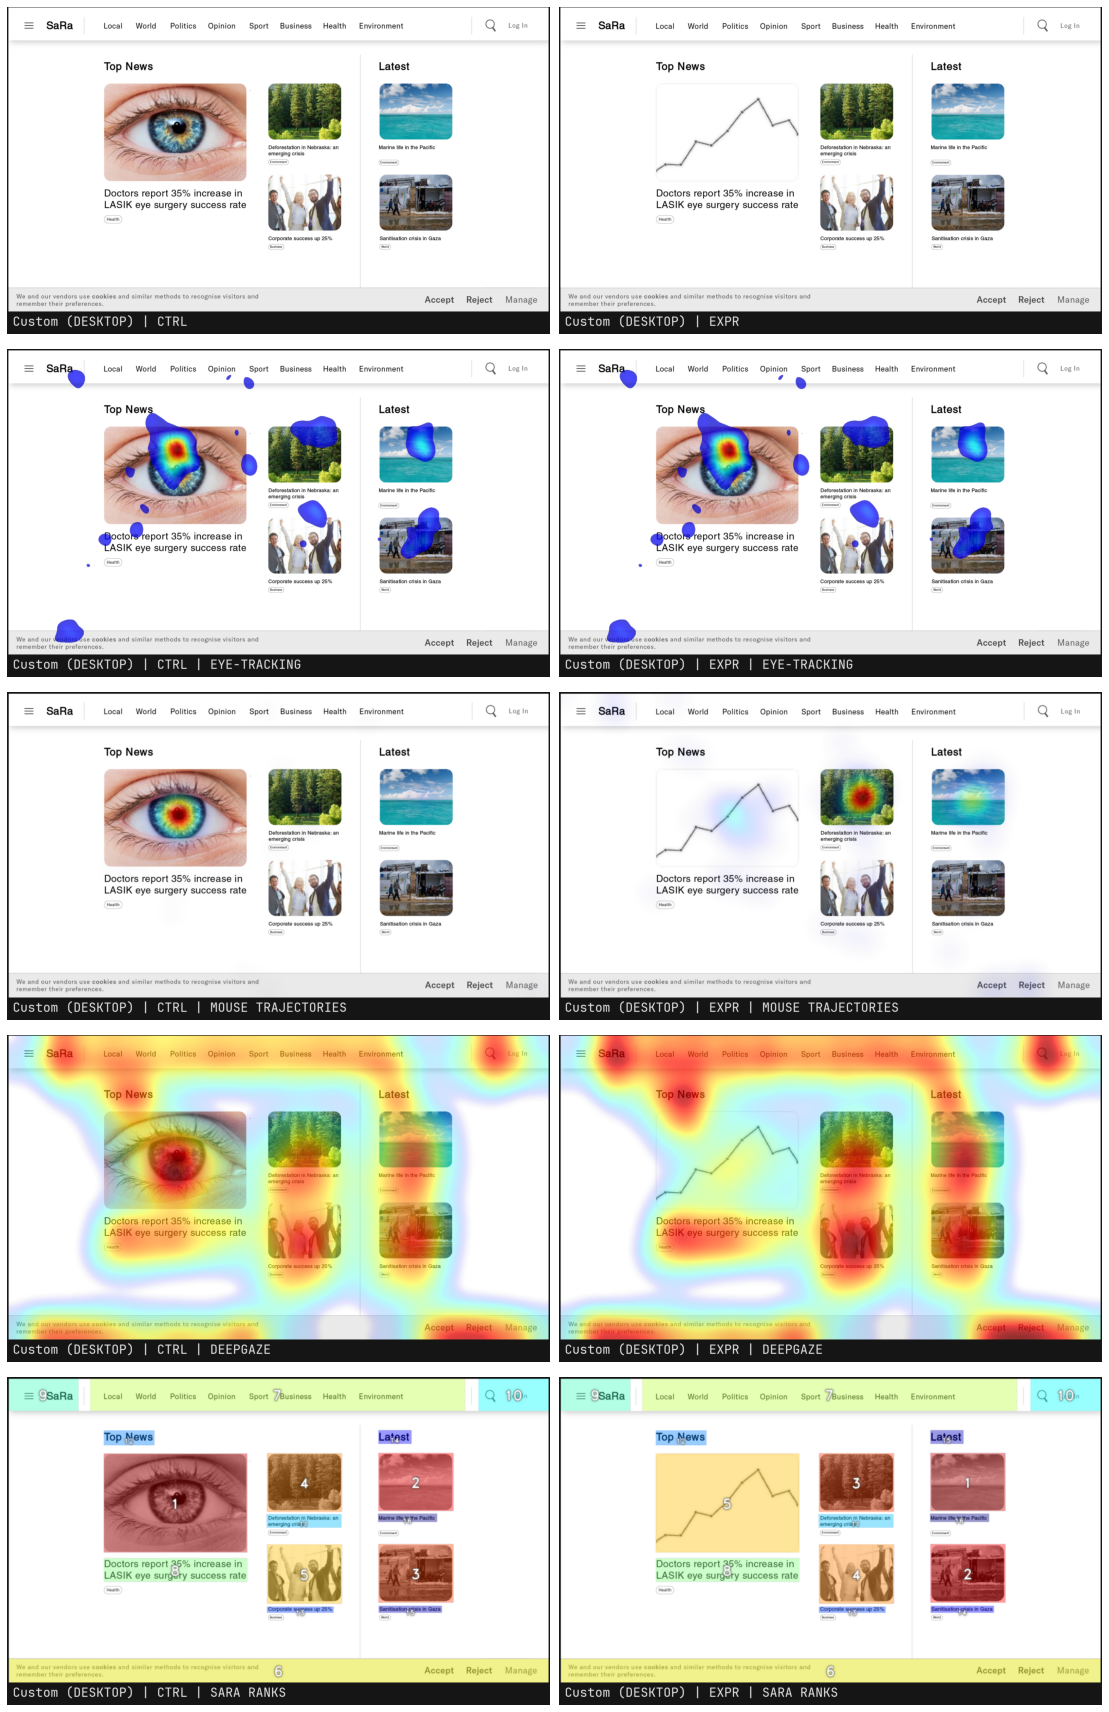

In [37]:
for p in range(10):
    plt.figure(figsize=(16, 24))

    plt.subplot(5,2,1)
    plt.imshow(images[names[p]]['A'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,2)
    plt.imshow(images[names[p]]['B'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,3)
    plt.imshow(tracking[names[p]]['A'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,4)
    plt.imshow(tracking[names[p]]['B'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,5)
    plt.imshow(trajectories[names[p]]['A'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,6)
    plt.imshow(trajectories[names[p]]['B'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,7)
    plt.imshow(deepgaze[names[p]]['A'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,8)
    plt.imshow(deepgaze[names[p]]['B'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,9)
    plt.imshow(ranks[names[p]]['A'], aspect='equal')
    plt.axis('off')

    plt.subplot(5,2,10)
    plt.imshow(ranks[names[p]]['B'], aspect='equal')
    plt.axis('off')

    plt.tight_layout(pad=1.5)

    plt.savefig(FIG_PATH + names[p] + '/' + f'{names[p]} Summary.png')

    plt.show()

    break